In [15]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from statsmodels.tsa.seasonal import seasonal_decompose
import xgboost as xgb
from datetime import datetime
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [5]:
columns = ['Time Series', 'AUD/USD', 'EUR/USD', 'NZD/USD', 'GBP/USD', 'BRL/USD', 'CAD/USD', 'CNY/USD', 'HKD/USD', 'INR/USD', 'KRW/USD', 'MXN/USD', 'ZAR/USD', 'SGD/USD', 'DKK/USD', 'YPY/USD', 'MYR/USD', 'NOK/USD', 'SEK/USD', 'LKR/USD', 'CHF/USD', 'TWD/USD', 'THB/USD', 'month', 'day', 'weekday']

df = pd.read_csv("./Foreign_Exchange_Rates.csv", header = 0).iloc[:, 1:].sort_values("Time Serie")
df['month'] = df["Time Serie"].map(lambda x: int(x.split("-")[1]))
df['day'] = df["Time Serie"].map(lambda x: int(x.split("-")[2]))
df['weekday'] = df["Time Serie"].map(lambda x: datetime.fromisoformat(x).weekday())
df.columns = columns
df.head(10)
# df["Time Serie"].map(lambda x: int(x.split("-")[2])).head()


,Time Series,AUD/USD,EUR/USD,NZD/USD,GBP/USD,BRL/USD,CAD/USD,CNY/USD,HKD/USD,INR/USD,...,MYR/USD,NOK/USD,SEK/USD,LKR/USD,CHF/USD,TWD/USD,THB/USD,month,day,weekday
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,3.8,7.964,8.443,72.3,1.5808,31.38,36.97,1,3,0
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,3.8,7.934,8.36,72.65,1.5565,30.6,37.13,1,4,1
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,3.8,7.935,8.353,72.95,1.5526,30.8,37.1,1,5,2
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,3.8,7.94,8.3675,72.95,1.554,31.75,37.62,1,6,3
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,3.8,7.966,8.415,73.15,1.5623,30.85,37.3,1,7,4
5,2000-01-10,1.5242,0.9754,1.935,0.6107,1.819,1.4568,8.2794,7.7785,43.55,...,3.8,8.024,8.449,73.3,1.5704,30.83,37.27,1,10,0
6,2000-01-11,1.5209,0.9688,1.9365,0.6068,1.8225,1.457,8.2795,7.7785,43.6,...,3.8,7.969,8.397,73.35,1.5605,30.83,37.61,1,11,1
7,2000-01-12,1.5202,0.9727,1.9286,0.6073,1.835,1.455,8.2796,7.7787,43.6,...,3.8,7.977,8.418,73.35,1.566,30.8,37.54,1,12,2
8,2000-01-13,1.4954,0.9737,1.9084,0.6067,1.814,1.4495,8.2798,7.7788,43.55,...,3.8,7.9425,8.417,73.35,1.5707,30.8,37.49,1,13,3
9,2000-01-14,1.5004,0.9874,1.9186,0.6115,1.805,1.4497,8.2797,7.7789,43.55,...,3.8,7.997,8.474,73.35,1.5945,30.83,37.55,1,14,4


In [6]:
df["Time Series"] = pd.to_datetime(df["Time Series"])
df[columns[1:]] = df[columns[1:]].apply(pd.to_numeric, errors='coerce').interpolate()
df = df.set_index('Time Series')
df.head(10)

,AUD/USD,EUR/USD,NZD/USD,GBP/USD,BRL/USD,CAD/USD,CNY/USD,HKD/USD,INR/USD,KRW/USD,...,MYR/USD,NOK/USD,SEK/USD,LKR/USD,CHF/USD,TWD/USD,THB/USD,month,day,weekday
Time Series,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,...,3.8,7.9640,8.4430,72.30,1.5808,31.38,36.97,1,3,0
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,3.8,7.9340,8.3600,72.65,1.5565,30.60,37.13,1,4,1
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,...,3.8,7.9350,8.3530,72.95,1.5526,30.80,37.10,1,5,2
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,...,3.8,7.9400,8.3675,72.95,1.5540,31.75,37.62,1,6,3
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,...,3.8,7.9660,8.4150,73.15,1.5623,30.85,37.30,1,7,4
2000-01-10,1.5242,0.9754,1.9350,0.6107,1.8190,1.4568,8.2794,7.7785,43.55,1133.5,...,3.8,8.0240,8.4490,73.30,1.5704,30.83,37.27,1,10,0
2000-01-11,1.5209,0.9688,1.9365,0.6068,1.8225,1.4570,8.2795,7.7785,43.60,1147.0,...,3.8,7.9690,8.3970,73.35,1.5605,30.83,37.61,1,11,1
2000-01-12,1.5202,0.9727,1.9286,0.6073,1.8350,1.4550,8.2796,7.7787,43.60,1144.5,...,3.8,7.9770,8.4180,73.35,1.5660,30.80,37.54,1,12,2
2000-01-13,1.4954,0.9737,1.9084,0.6067,1.8140,1.4495,8.2798,7.7788,43.55,1135.5,...,3.8,7.9425,8.4170,73.35,1.5707,30.80,37.49,1,13,3


<AxesSubplot:xlabel='Time Series'>

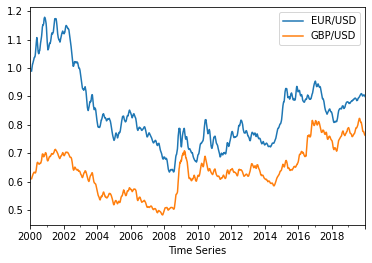

In [7]:
df.rolling(22).mean().plot(y = ['EUR/USD', 'GBP/USD'])

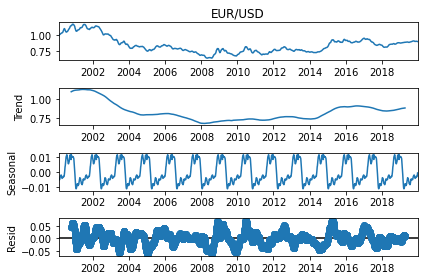

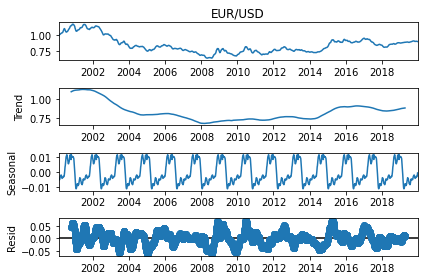

In [29]:
result = seasonal_decompose(df['EUR/USD'].rolling(22).mean().dropna(), model = 'additive', period=365)
result.plot()

In [30]:
columns2 = list(filter(lambda x: x not in ["Time Series", "EUR/USD"], columns))

n = 365

x = df[columns2][:-n]
y = df['EUR/USD'][n:]
x

,AUD/USD,NZD/USD,GBP/USD,BRL/USD,CAD/USD,CNY/USD,HKD/USD,INR/USD,KRW/USD,MXN/USD,...,MYR/USD,NOK/USD,SEK/USD,LKR/USD,CHF/USD,TWD/USD,THB/USD,month,day,weekday
Time Series,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.00,9.4015,...,3.800,7.9640,8.4430,72.30,1.5808,31.38,36.97,1,3,0
2000-01-04,1.5239,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.50,9.4570,...,3.800,7.9340,8.3600,72.65,1.5565,30.60,37.13,1,4,1
2000-01-05,1.5267,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.00,9.5350,...,3.800,7.9350,8.3530,72.95,1.5526,30.80,37.10,1,5,2
2000-01-06,1.5291,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.50,9.5670,...,3.800,7.9400,8.3675,72.95,1.5540,31.75,37.62,1,6,3
2000-01-07,1.5272,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.00,9.5200,...,3.800,7.9660,8.4150,73.15,1.5623,30.85,37.30,1,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,1.3510,1.4717,0.7622,3.7530,1.3006,6.8154,7.8486,68.37,1118.15,18.6255,...,4.064,8.1740,8.8033,159.40,0.9923,30.63,33.13,8,1,2
2018-08-02,1.3552,1.4802,0.7672,3.7555,1.3004,6.8380,7.8492,68.63,1126.91,18.6270,...,4.074,8.2235,8.8729,159.60,0.9943,30.71,33.27,8,2,3
2018-08-03,1.3503,1.4799,0.7680,3.7133,1.2975,6.8309,7.8486,68.54,1122.68,18.5725,...,4.080,8.2361,8.9009,159.70,0.9926,30.57,33.24,8,3,4


In [31]:
from sklearn.model_selection import train_test_split

model = xgb.XGBRegressor()

train_size = 0.8

x_train, x_test = x[:int(len(x) * train_size)], x[int(len(x) * train_size):]
y_train, y_test = y[:int(len(y) * train_size)], y[int(len(y) * train_size):]

model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

/tmp/ipykernel_3133524/2285818853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["predicted EUR/USD train"] = np.concatenate((np.empty((n,)) * np.nan, np.array(model.predict(x_train)), np.empty((int(1 + len(x) * (1 - train_size)),)) * np.nan))
/tmp/ipykernel_3133524/2285818853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["predicted EUR/USD test"] = np.concatenate((np.empty((n,)) * np.nan, np.empty((int(len(x) * train_size),)) * np.nan, np.array(model.predict(x_test))))


<AxesSubplot:xlabel='Time Series'>

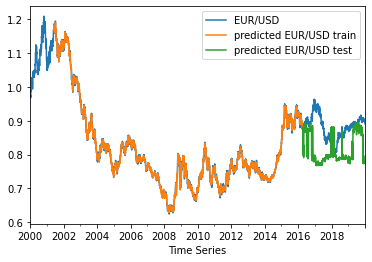

In [32]:
df2 = df[:]
# df2["EUR/USD"] = np.array(y)
df2["predicted EUR/USD train"] = np.concatenate((np.empty((n,)) * np.nan, np.array(model.predict(x_train)), np.empty((int(1 + len(x) * (1 - train_size)),)) * np.nan))
df2["predicted EUR/USD test"] = np.concatenate((np.empty((n,)) * np.nan, np.empty((int(len(x) * train_size),)) * np.nan, np.array(model.predict(x_test))))
df2[["EUR/USD", "predicted EUR/USD train", "predicted EUR/USD test"]].plot()


* feature engineering (dni tygodnia, miesiąc)
* porównanie z innymi modelami

In [33]:
from statsmodels.tsa.arima.model import ARIMA

/home/michla/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/home/michla/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/home/michla/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


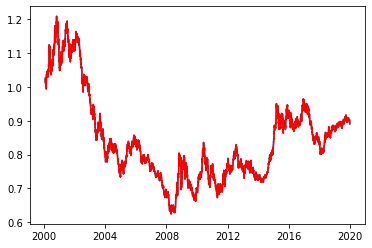

In [49]:
model = ARIMA(df["EUR/USD"], order=(2,1,22))
results = model.fit()
plt.plot(df[["EUR/USD"]][22:])
plt.plot(results.fittedvalues[22:], color='red')

* zacząć raport
* dopasowanie parametrów
* w jakim horyzoncie czasowym przewidywanie ma sens
* wolument tranzakcji (?) łatwiejsze/trudniejsza
* PROFET

In [8]:
import models

MSR: 0.00032310481649003195


<Figure size 1440x720 with 0 Axes>

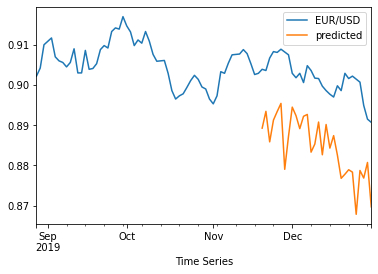

In [36]:
window_size, step_size = 30, 30

model = models.MultiStepForecaster(window_size, step_size)

preds, err = model.fit(df[:-step_size], df["EUR/USD"][:-step_size])

plt.figure(figsize=(20, 10))
model.plot(df, df["EUR/USD"], "EUR/USD", df=df)
plt.show()

In [39]:
window_size, step_size = 100, 30

model = models.MultiStepForecaster(window_size, step_size)

preds, err = model.fit(df[:-step_size], df["EUR/USD"][:-step_size])

plt.figure(figsize=(20, 10))
model.plot(df, df["EUR/USD"], "EUR/USD", df=df)
plt.show()

KeyboardInterrupt: 

MSR: 0.00016654390827366785


<Figure size 1440x720 with 0 Axes>

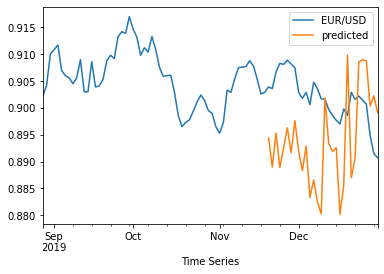

In [38]:
window_size, step_size = 500, 30

model = models.MultiStepForecaster(window_size, step_size)

preds, err = model.fit(df[:-step_size], df["EUR/USD"][:-step_size])

plt.figure(figsize=(20, 10))
model.plot(df, df["EUR/USD"], "EUR/USD", df=df)
plt.show()